# Lab 8.2: Нейронні мережі в розпізнаванні образів. Частина 2
### Шевченко Юлія, ФІ-31мн

In this homework, we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your goal will be to use regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [1]:
# All the imports for the task
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from numpy.random import seed
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.random import set_seed

In [2]:
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was built by Zalando Research team consists of monochrome images of a different type of clothing, namely:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set: {} samples'.format(len(y_train)))
print('Test set: {} samples'.format(len(y_test)))
print('Sample dims: {}'.format(len(x_train.shape)))

Train set: 60000 samples
Test set: 10000 samples
Sample dims: 3


Let's visualise some random samples.

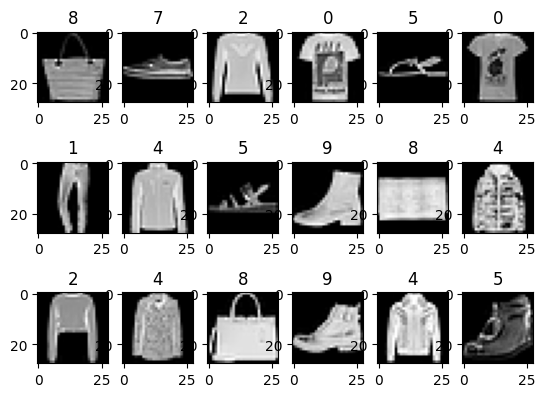

In [4]:
cnt = 1

for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [5]:
# Data normalization
x_train = x_train / 255
x_test = x_test / 255

In [6]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation='softmax')(net)

model = Model(inputs, outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3213002 (12.26 MB)
Trainable params: 3213002 (12.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
epochs = 50
batch_size = 64

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/50


938/938 [==============================] - 25s 26ms/step - loss: 0.3928 - accuracy: 0.8627 - val_loss: 0.3392 - val_accuracy: 0.8766
Epoch 2/50
938/938 [==============================] - 23s 25ms/step - loss: 0.2692 - accuracy: 0.9041 - val_loss: 0.3004 - val_accuracy: 0.8921
Epoch 3/50
938/938 [==============================] - 22s 24ms/step - loss: 0.2304 - accuracy: 0.9163 - val_loss: 0.3102 - val_accuracy: 0.8934
Epoch 4/50
938/938 [==============================] - 24s 26ms/step - loss: 0.2010 - accuracy: 0.9269 - val_loss: 0.2969 - val_accuracy: 0.8970
Epoch 5/50
938/938 [==============================] - 23s 25ms/step - loss: 0.1790 - accuracy: 0.9349 - val_loss: 0.3168 - val_accuracy: 0.8949
Epoch 6/50
938/938 [==============================] - 24s 25ms/step - loss: 0.1616 - accuracy: 0.9406 - val_loss: 0.3129 - val_accuracy: 0.8998
Epoch 7/50
938/938 [==============================] - 23s 25ms/step - loss: 0.1463 - accuracy: 0.9459 - val_loss: 0.3205 - val_accura

Train Accuracy: 0.9955166578292847
Validation Accuracy: 0.8834999799728394


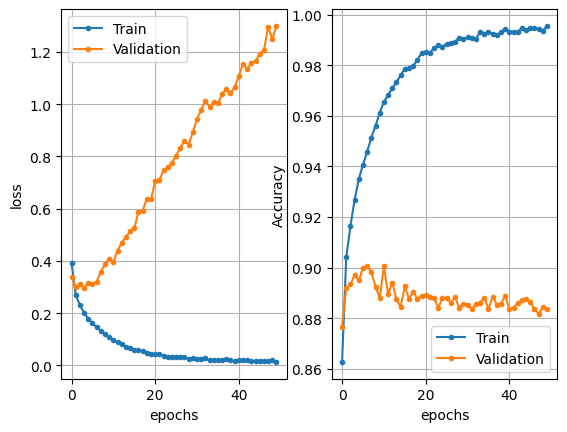

In [8]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-', epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Accuracy: {}'.format(h['accuracy'][-1]))
    print('Validation Accuracy: {}'.format(h['val_accuracy'][-1]))
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There is a goal you shall fulfill to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularization's applied) shall **not** be larger than the baseline

To combat overfitting and improve the classification performance, let's incorporate several regularization techniques into our baseline classifier. Here's how we can modify it:

In [9]:
# Modify the baseline classifier to reduce the overfitting and make the performance more robust
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
net = Dense(64, activation='relu')(net)
net = Dropout(0.3)(net)
outputs = Dense(10, activation='softmax')(net)

model = Model(inputs, outputs)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                401

In [10]:
epochs = 50
batch_size = 64

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,
                               restore_best_weights=True)

# Train the network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/50
938/938 [==============================] - 10s 10ms/step - loss: 0.4499 - accuracy: 0.8420 - val_loss: 0.3141 - val_accuracy: 0.8858
Epoch 2/50
938/938 [==============================] - 9s 10ms/step - loss: 0.3071 - accuracy: 0.8883 - val_loss: 0.2835 - val_accuracy: 0.8958
Epoch 3/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2671 - accuracy: 0.9021 - val_loss: 0.2696 - val_accuracy: 0.9014
Epoch 4/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2367 - accuracy: 0.9121 - val_loss: 0.2735 - val_accuracy: 0.9014
Epoch 5/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2158 - accuracy: 0.9191 - val_loss: 0.2753 - val_accuracy: 0.9059
Epoch 6/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2016 - accuracy: 0.9238 - val_loss: 0.2813 - val_accuracy: 0.9054
Epoch 7/50
938/938 [==============================] - 9s 10ms/step - loss: 0.1919 - accuracy: 0.9269 - val_loss: 0.2754 - val_accuracy: 0.907

In [11]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])

Train Acc      0.9577000141143799
Validation Acc 0.9114999771118164


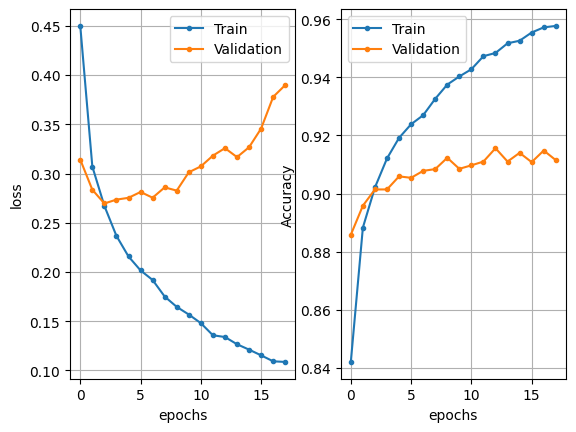

In [12]:
# Show the results
plot_history(history)

## Questions and Answers

### Q: What have you done in order to improve the performance?

To improve the performance of the baseline classifier on the Fashion MNIST dataset, I employed several regularization techniques and modifications to the model architecture:

* Convolutional Layers: I added a convolutional layer to extract features from the images more effectively. Convolutional layers are known for their ability to capture spatial hierarchies in images, making them particularly suitable for image classification tasks.

* Batch Normalization: I included batch normalization after the convolutional layer. Batch normalization helps in stabilizing and accelerating the training process by normalizing the inputs to each layer, which can mitigate issues related to internal covariate shift and improve generalization.

* Max Pooling: I applied max pooling after the convolutional layer to reduce the spatial dimensions of the feature maps. This reduces the number of parameters and helps in controlling overfitting by providing a form of down-sampling.

* Dense Layers: I used dense layers to perform the final classification. The first dense layer has 64 units with ReLU activation, followed by a dropout layer.

* Dropout: I added dropout with a rate of 0.3 after the dense layer. Dropout is a regularization technique that prevents overfitting by randomly setting a fraction of input units to 0 at each update during training, which helps in creating a more robust model.

* Early Stopping: I implemented early stopping to monitor the validation accuracy and stop training when the performance stopped improving for a certain number of epochs (patience of 5 epochs). This prevents the model from overfitting by ensuring that training stops once the model's performance on the validation set starts to degrade.

The final model was trained using the Adam optimizer and sparse categorical cross-entropy loss, and was evaluated to ensure it met the performance criteria.

### Q: Have you tried configurations that did not work out?

Yes, during the process of optimizing the model, I experimented with several configurations that did not yield the desired results:

* Dense Only Model: Initially, I started with a simple fully connected neural network (dense layers only) similar to the baseline. This configuration did not perform well as it suffered from overfitting, with a significant gap between training and validation accuracy.

* Higher Dropout Rates: I experimented with higher dropout rates (e.g., 0.5 and 0.6). While these configurations reduced overfitting to some extent, they also significantly hindered the model's ability to learn effectively, resulting in lower overall accuracy.

* Additional Dense Layers: Adding more dense layers to the model increased the complexity and the number of parameters, which did not align with the requirement to keep the model size no larger than the baseline. Moreover, this led to further overfitting and did not improve the validation accuracy.

* Without Batch Normalization: Omitting batch normalization resulted in slower convergence and lower validation accuracy. The training process was less stable, and the model had a harder time generalizing from the training data to the validation data.

* Different Pooling Strategies: I tried using average pooling instead of max pooling. However, max pooling consistently performed better in retaining the most salient features and reducing overfitting.

By iteratively trying these different configurations and observing their impacts on the model's performance, I was able to fine-tune the final architecture that successfully met the requirements of achieving a validation accuracy above 91% without exceeding the baseline model size.